In [161]:
ν1, ν2 = 1, 4;
h1, h2 = 1, 2;
N1, N2 = 3, 3;

In [174]:
ν2

4

In [162]:
using SparseArrays
using LinearAlgebra

In [163]:
⊗ = kron

kron (generic function with 32 methods)

In [164]:
b1 = ν1/h1^2;
b2 = ν2/h2^2;
a = 2*(b1+b2);

In [210]:
function laplacian(ν1, ν2, h1, h2, N1, N2)

    B1 = sparse(SymTridiagonal(2*ones(N1), -1*ones(N1))/h1^2);
    C1 = sparse(Diagonal(ones(N2)));
    B2 = sparse(Diagonal(ones(N1))/h2^2);
    C2 = sparse(SymTridiagonal(2*ones(N2), -1*ones(N2)));

    return ν1*(B1⊗C1) + ν2*(B2⊗C2);
end

laplacian (generic function with 1 method)

In [211]:
B1 = sparse(SymTridiagonal(2*ones(N1), -1*ones(N1))/h1^2);
C1 = sparse(Diagonal(ones(N2)));
view(ν1*(B1⊗C1), :, :);

In [212]:
B2 = sparse(Diagonal(ones(N1))/h2^2);
C2 = sparse(SymTridiagonal(2*ones(N2), -1*ones(N2)));
view(ν2*(B2⊗C2), :, :);

In [225]:
J = laplacian(ν1, ν2, h1, h2, N1, N2);

In [214]:
view(J, :, :)

9×9 view(::SparseMatrixCSC{Float64,Int64}, :, :) with eltype Float64:
  4.0  -1.0   0.0  -1.0   0.0   0.0   0.0   0.0   0.0
 -1.0   4.0  -1.0   0.0  -1.0   0.0   0.0   0.0   0.0
  0.0  -1.0   4.0   0.0   0.0  -1.0   0.0   0.0   0.0
 -1.0   0.0   0.0   4.0  -1.0   0.0  -1.0   0.0   0.0
  0.0  -1.0   0.0  -1.0   4.0  -1.0   0.0  -1.0   0.0
  0.0   0.0  -1.0   0.0  -1.0   4.0   0.0   0.0  -1.0
  0.0   0.0   0.0  -1.0   0.0   0.0   4.0  -1.0   0.0
  0.0   0.0   0.0   0.0  -1.0   0.0  -1.0   4.0  -1.0
  0.0   0.0   0.0   0.0   0.0  -1.0   0.0  -1.0   4.0

In [215]:
function forcing(ν1, ν2, h1, h2, N1, N2)
    return -ones(N1*N2,1)
end

forcing (generic function with 1 method)

In [216]:
forcing(ν1, ν2, h1, h2, N1, N2)

9×1 Array{Float64,2}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [217]:
function diffusivity(ν1, ν2, h1, h2, N1, N2)

    h1 = h1/(N1+1);
    h2 = h2/(N2+1);

    L = laplacian(ν1, ν2, h1, h2, N1, N2);
    c = forcing(ν1, ν2, h1, h2, N1, N2);

    return uhref = L\c;
end

diffusivity (generic function with 1 method)

In [223]:
u = diffusivity(ν1, ν2, h1, h2, N1*100, N2*100);

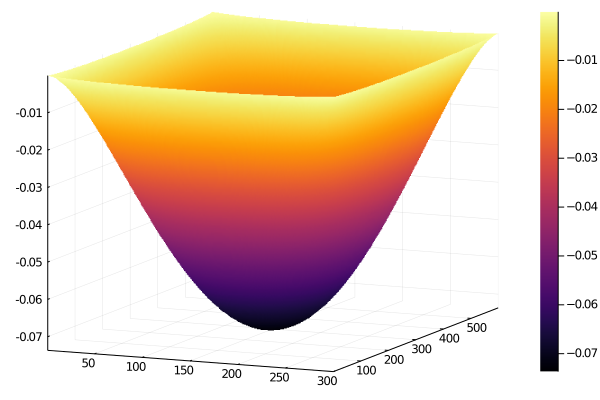

In [224]:
x = 1:h1:h1*(N1*100);
y = 1:h2:h2*(N2*100);
p = surface(x, y, u)

In [234]:
@time begin
    L = laplacian(ν1, ν2, h1, h2, N1*500, N2*500);
    c = forcing(ν1, ν2, h1, h2, N1*500, N2*500);
    L\c;
end

 10.481936 seconds (128 allocations: 3.030 GiB, 6.12% gc time)


2250000×1 Array{Float64,2}:
  -4.474188698599715
  -8.44837739719943
 -12.12021882210914
 -15.58267115225882
 -18.886628193915158
 -22.06345934902513
 -25.134260738774017
 -28.11414866445515
 -31.014475082776144
 -33.84407463643942
 -36.61001725477031
 -39.31808844641552
 -41.97310997991784
   ⋮
 -39.3180884464152
 -36.610017254770014
 -33.84407463643916
 -31.014475082775913
 -28.11414866445494
 -25.13426073877383
 -22.063459349024974
 -18.886628193915026
 -15.582671152258714
 -12.12021882210906
  -8.448377397199375
  -4.474188698599686